# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitations">Limitations</a></li>    
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and other 18 columns.
## questions That We Can Answer From This Dataset? 
1. Research Question 1 (Which genres are most popular ? )
2. Research Question 2 (Which genres are most popular from year to year ? )
3. Research Question 3 ( what is The Relation Between Budget and Revenue? )
4. Research Question 4 (What are the Top 10 movies by Revenue and their budget? )
5. Research Question 5 (what are the lowest 5 movies by Revenue and their budget? )
6. Research Question 6 ( what are the Top 10 movies by profit? )
7. Research Question 7 (what are the Lowest 5 movies by profit? )
8. Research Question 8 (what is The Relation between Populairity and Revenue? )
9. Research Question 9 (what is The Relation between Populairity and Vote Count? )
10. Research Question 10 (what are The Top 10 Rated Movies? )
11. Research Question 11  (Which year has the highest number of movie releases? )
12. Research Question 12 (Which production companies are most popular ? )



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Note:** This Data Contains 10866 Raws and 21 Columns, it has null values, The id column is integer (should be string) and the release date column type is string (should be date format)

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Note:** The Cell above Shows The Columns That have Null Values, and how many

In [6]:
df.isnull().any(axis=1).sum()

8874

**Note:** The Number of Null Values is 8874

In [7]:
df.duplicated().sum()

1

**Note:** We have Just one Duplicated raw

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Note:** There are columns have Zero Values

<a id='Data Cleaning'></a>
### Data Cleaning 
1. Remove unwanted columns.
2. Remove nulls and duplicated.
3. Change release date column type to date format and id column to string.
4. Dealing with zero values(replace them with the mean).

##### 1. Remove The Unwanted Columns( homepage and tagline )
these columns have Many Null values and we won't use them in our analysis

In [9]:
unwanted_c = ['homepage', 'tagline']
df.drop(unwanted_c, axis=1, inplace=True)

#### 2. Remove Nulls and Duplicated Raws

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

**Note:** All he null values have been dropped

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

**Note:** The Duplicated raw has been dropped 

#### 3. change release date column type to date format and id column to string

In [14]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [15]:
df['id'] = df['id'].astype(str) 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 10865
Data columns (total 19 columns):
id                      8664 non-null object
imdb_id                 8664 non-null object
popularity              8664 non-null float64
budget                  8664 non-null int64
revenue                 8664 non-null int64
original_title          8664 non-null object
cast                    8664 non-null object
director                8664 non-null object
keywords                8664 non-null object
overview                8664 non-null object
runtime                 8664 non-null int64
genres                  8664 non-null object
production_companies    8664 non-null object
release_date            8664 non-null datetime64[ns]
vote_count              8664 non-null int64
vote_average            8664 non-null float64
release_year            8664 non-null int64
budget_adj              8664 non-null float64
revenue_adj             8664 non-null float64
dtypes: datetime64[ns](1), flo

**Note:** Now The id Column is String and The release date column is date formatted 

#### 4. Replace The Zero Values to Mean Value

In [17]:
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  3938
revenue                 4128
original_title             0
cast                       0
director                   0
keywords                   0
overview                   0
runtime                    7
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              3938
revenue_adj             4128
dtype: int64

In [18]:
df['budget'] = df['budget'].replace(0, df['budget'].mean())
df['revenue']= df['revenue'].replace(0, df['revenue'].mean())
df['runtime']= df['runtime'].replace(0, df['runtime'].mean())
df['budget_adj']= df['budget_adj'].replace(0, df['budget_adj'].mean())
df['revenue_adj']= df['revenue_adj'].replace(0, df['revenue_adj'].mean())

In [19]:
df.isin([0]).sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

**Note:** Now we don't have any Zero Values

In [20]:
df.to_csv('tmdb_movies2.csv', index= False)

**Note:** Save the cleaned Data 

<a id='eda'></a>
## Exploratory Data Analysis

In [21]:
df = pd.read_csv('tmdb_movies2.csv')

In [22]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['id'] = df['id'].astype(str) 

**Note:** Open the Data file and converting the id and release date columns

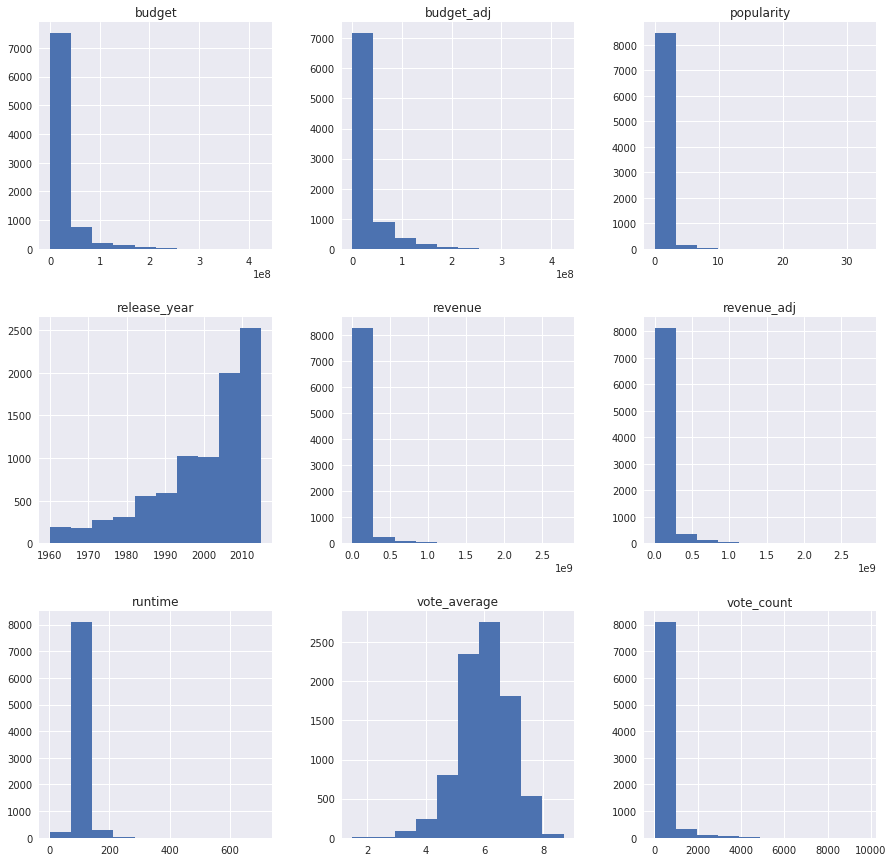

In [23]:
df.hist(figsize=(15, 15));

**Note:** by looking at above charts, most of the movies runtime is between 100 and 150 minutes, The movies producing are increasing over years, And highest vote average count is between 5 and 7

### Research Question 1 (Which genres are most popular ? )

In [24]:
df_new = df.set_index(['id', 'release_year'])
df_new.head(2)

,,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
id,release_year,,,,,,,,,,,,,,,,,
135397,2015,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
76341,2015,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08


**Note:** First We will set The id and release year columns as an index

In [25]:
genres = df_new['genres'].str.split('|', expand=True)
genres = genres.stack()
genres = pd.DataFrame(genres, columns = ['genres'])
genres.head()

genres
id     release_year                   
135397 2015         0           Action
                    1        Adventure
                    2  Science Fiction
                    3         Thriller
76341  2015         0           Action

**Note:** Second we will split genres column, then we will reshape the data frame using stack function and finally make the data a panda data frame

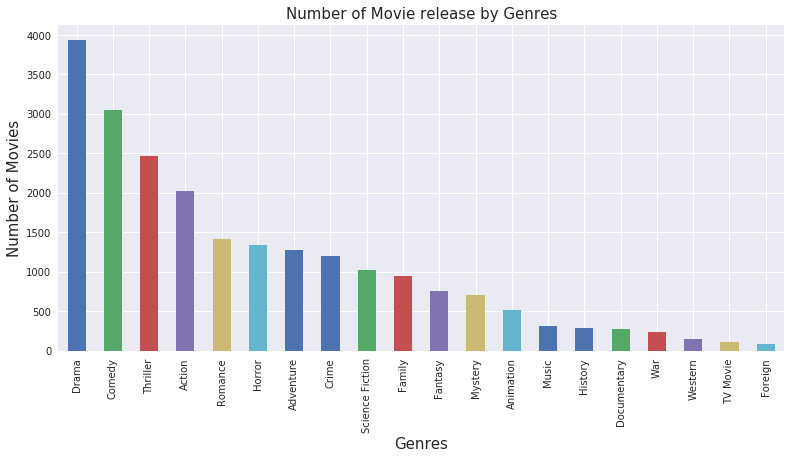

In [96]:
popular_genres = genres['genres'].value_counts()
popular_genres.plot(kind='bar', figsize=(13, 6))
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Number of Movie release by Genres', fontsize=15);

**Note:** The Cart above shows that Drama has the highest number of movies relaesed, followed by comedy, Thriller and Action movies  

### Research Question 2 (Which genres are most popular from year to year ? )

In [30]:
genres.reset_index(inplace=True)

**Note:** We Gonna reset the indexs so we can count the top genres each year

In [31]:
yearly = genres.groupby('release_year')['genres'].value_counts()
yearly

release_year  genres         
1960          Drama               12
              Action               7
              Comedy               7
              Horror               7
              Thriller             6
              Western              6
              Adventure            5
              Romance              5
              History              4
              Family               3
              Science Fiction      3
              Crime                2
              Fantasy              2
              Music                1
              War                  1
1961          Drama               16
              Comedy               8
              Action               7
              Adventure            6
              Romance              6
              Family               3
              History              3
              Horror               3
              Western              3
              Crime                2
              Music                2
        

**Note:** Grouping release year and the count of genres for each year 

In [32]:
movies_by_year = yearly.groupby(level=0).head(1)
pd.DataFrame(movies_by_year).rename(columns={'genres':'Count'})

,,Count
release_year,genres,
1960,Drama,12
1961,Drama,16
1962,Drama,19
1963,Comedy,13
1964,Drama,20
1965,Drama,18
1966,Comedy,15
1967,Comedy,15
1968,Drama,19


**Note:** Drama and Comedy are the most popular genres from year to year

### Research Question 3 ( What is The Relation Between Budget and Revenue? )

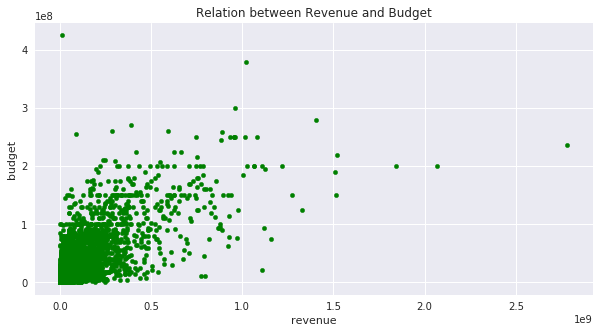

In [89]:
df.plot(x= 'revenue', y= 'budget', c= 'green', kind='scatter', figsize=(10, 5));
plt.title('Relation between Revenue and Budget');

**Note:** Revenue and Budget have a postive correlation, when Revenue increse the Budget increases

### Research Question 4 (what are the Top 10 movies by Revenue and their budget? )

In [50]:
top_revenue = df.nlargest(10, 'revenue')
top_revenue.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1014,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
3909,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1.645034e+09
3308,24428,tt0848228,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,1.299558e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
14,99861,tt2395427,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1.125036e+09
2544,12445,tt1201607,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09,1.202818e+09
4083,109445,tt2294629,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,102.0,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09,1.124219e+09
4086,68721,tt1300854,4.946136,200000000.0,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,When Tony Stark's world is torn apart by a for...,130.0,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09,1.015440e+09


In [68]:
revenue_top = top_revenue['revenue'].sum()
budget_top = top_revenue['budget'].sum()

In [69]:
top_revenue['revenue'] = top_revenue['revenue'].apply(lambda x: x/revenue_top)
top_revenue['budget'] = top_revenue['budget'].apply(lambda x: x/budget_top)

**Note:** we gonna take the proportion of revenue and budget column for better analysis

In [70]:
top_revenue.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1014,19995,tt0499549,9.432768,0.121414,0.169021,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09
3,140607,tt2488496,11.173104,0.102459,0.125675,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
3909,597,tt0120338,4.355219,0.102459,0.112115,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1.645034e+09
3308,24428,tt0848228,7.637767,0.112705,0.092337,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,1.299558e+09
0,135397,tt0369610,32.985763,0.076844,0.091971,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
4,168259,tt2820852,9.335014,0.097336,0.091529,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
14,99861,tt2395427,5.944927,0.143443,0.085378,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1.125036e+09
2544,12445,tt1201607,5.711315,0.064037,0.080686,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09,1.202818e+09
4083,109445,tt2294629,6.112766,0.076844,0.077429,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,102.0,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09,1.124219e+09
4086,68721,tt1300854,4.946136,0.102459,0.073857,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,When Tony Stark's world is torn apart by a for...,130.0,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09,1.015440e+09


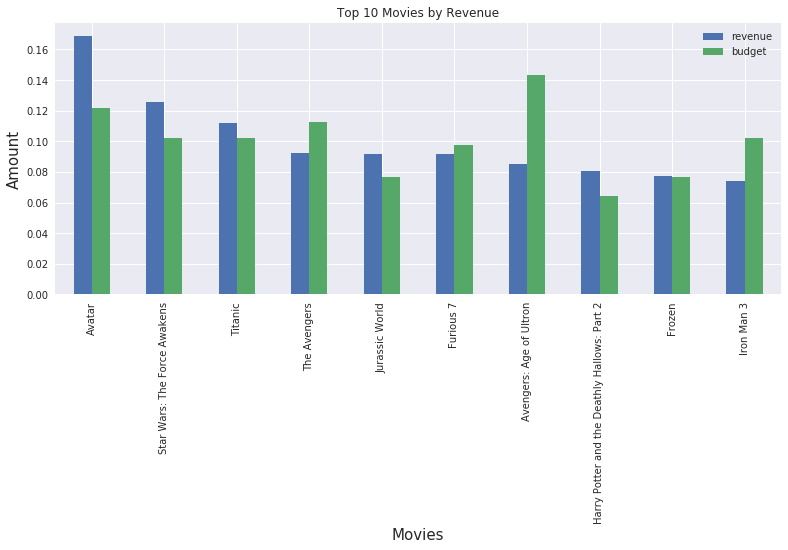

In [103]:
top_revenue.index = top_revenue['original_title']
top_revenue[['revenue', 'budget']].plot(kind='bar', figsize=(13, 5))
plt.xlabel('Movies', fontsize= 15)
plt.ylabel('Amount', fontsize=15)
plt.title('Top 10 Movies by Revenue');

**Note:** Avatar is the top movie by Revenue and Budget 

### Research Question 5 ( what are the lowest 5 movies by Revenue and their budget? )

In [36]:
lowest_revenue = df.nsmallest(5, 'revenue')
lowest_revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6250,2293,tt0113749,0.552091,6.000000e+06,2.0,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,sex|game show|slacker|comic|shopping,"Both dumped by their girlfriends, two best fri...",94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8.585801e+06,2.861934
1009,18196,tt0076683,0.097126,1.771346e+07,3.0,The Sentinel,Chris Sarandon|Cristina Raines|Martin Balsam|J...,Michael Winner,secret society|hell|hellgate|model|demon,A commitment-shy New York fashion model moves ...,92.0,Horror|Drama|Mystery,Universal Pictures,1977-01-07,14,6.3,1977,2.131241e+07,10.793343
8424,12101,tt0070723,0.621476,1.771346e+07,3.0,Soylent Green,Charlton Heston|Edward G. Robinson|Leigh Taylo...,Richard Fleischer,paranoia|dystopia|overpopulation|near future,"In an overpopulated futuristic Earth, a New Yo...",97.0,Mystery|Science Fiction|Thriller,Metro-Goldwyn-Mayer (MGM),1973-04-19,124,6.6,1973,2.131241e+07,14.733479
6594,9431,tt0117826,0.578849,1.500000e+07,5.0,Bordello of Blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,female nudity|brothel|vampire,Private eye Rafe Guttman (Dennis Miller) is hi...,87.0,Horror|Comedy,Tales From The Crypt Holdings|Universal City S...,1996-08-16,27,4.9,1996,2.085325e+07,6.951084
6323,48781,tt0113965,0.183034,6.400000e+06,6.0,Never Talk to Strangers,Rebecca De Mornay|Antonio Banderas|Dennis Mill...,Peter Hall,telephone|police|love|police psychologist|erot...,"Sarah Taylor, a police psychologist, meets a m...",86.0,Thriller|Romance,TriStar Pictures,1995-10-20,15,4.5,1995,9.158188e+06,8.585801


In [72]:
revenue_lowest = lowest_revenue['revenue'].sum()
budget_lowest = lowest_revenue['budget'].sum()

In [73]:
lowest_revenue['revenue'] = lowest_revenue['revenue'].apply(lambda x: x/revenue_lowest)        
lowest_revenue['budget'] = lowest_revenue['budget'].apply(lambda x: x/budget_lowest)        

**Note:** we gonna take the proportion of revenue and budget column for better analysis

In [76]:
lowest_revenue.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,,,,
Mallrats,2293,tt0113749,0.552091,0.095500,0.105263,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,sex|game show|slacker|comic|shopping,"Both dumped by their girlfriends, two best fri...",94.0,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,1995-10-20,201,6.8,1995,8.585801e+06,2.861934
The Sentinel,18196,tt0076683,0.097126,0.281941,0.157895,The Sentinel,Chris Sarandon|Cristina Raines|Martin Balsam|J...,Michael Winner,secret society|hell|hellgate|model|demon,A commitment-shy New York fashion model moves ...,92.0,Horror|Drama|Mystery,Universal Pictures,1977-01-07,14,6.3,1977,2.131241e+07,10.793343
Soylent Green,12101,tt0070723,0.621476,0.281941,0.157895,Soylent Green,Charlton Heston|Edward G. Robinson|Leigh Taylo...,Richard Fleischer,paranoia|dystopia|overpopulation|near future,"In an overpopulated futuristic Earth, a New Yo...",97.0,Mystery|Science Fiction|Thriller,Metro-Goldwyn-Mayer (MGM),1973-04-19,124,6.6,1973,2.131241e+07,14.733479
Bordello of Blood,9431,tt0117826,0.578849,0.238751,0.263158,Bordello of Blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,female nudity|brothel|vampire,Private eye Rafe Guttman (Dennis Miller) is hi...,87.0,Horror|Comedy,Tales From The Crypt Holdings|Universal City S...,1996-08-16,27,4.9,1996,2.085325e+07,6.951084
Never Talk to Strangers,48781,tt0113965,0.183034,0.101867,0.315789,Never Talk to Strangers,Rebecca De Mornay|Antonio Banderas|Dennis Mill...,Peter Hall,telephone|police|love|police psychologist|erot...,"Sarah Taylor, a police psychologist, meets a m...",86.0,Thriller|Romance,TriStar Pictures,1995-10-20,15,4.5,1995,9.158188e+06,8.585801


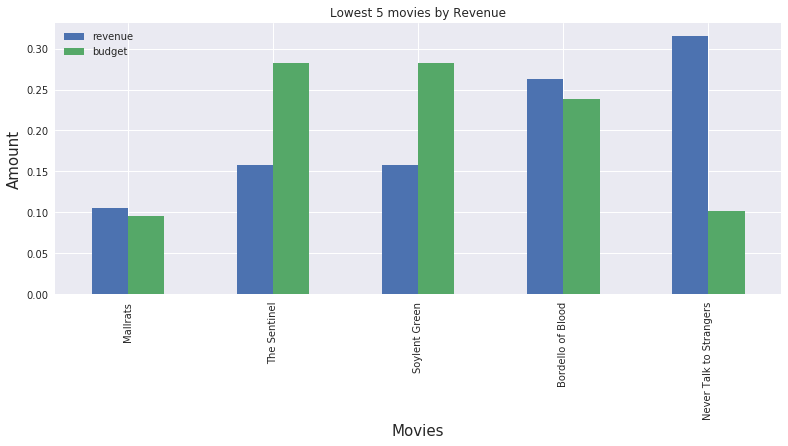

In [102]:
lowest_revenue.index = lowest_revenue['original_title']
lowest_revenue[['revenue', 'budget']].plot(kind='bar', figsize=(13, 5))
plt.xlabel('Movies', fontsize= 15)
plt.ylabel('Amount', fontsize=15)
plt.title('Lowest 5 movies by Revenue');

**Note:** Mallrats lowest revenue

### Research Question 6 ( what are the Top 10 movies by profit ? )

In [43]:
df['profit'] = df['revenue'] - df['budget'] 

**Note:** Creat profit Column 

In [49]:
top_profit = df.nlargest(10, 'profit')
top_profit.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1014,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
3909,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,1.645034e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
3308,24428,tt0848228,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,1.299558e+09
2544,12445,tt1201607,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,"Harry, Ron and Hermione continue their quest t...",130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09,1.202818e+09
14,99861,tt2395427,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,When Tony Stark tries to jumpstart a dormant p...,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,1.125036e+09
4083,109445,tt2294629,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,Young princess Anna of Arendelle dreams about ...,102.0,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.404050e+08,1.192711e+09,1.124219e+09
6202,1642,tt0113957,1.136610,22000000.0,1.106280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,cheating|new identity|computer virus|chase|com...,Angela Bennett is a freelance software enginee...,114.0,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995,3.148127e+07,1.583050e+09,1.084280e+09


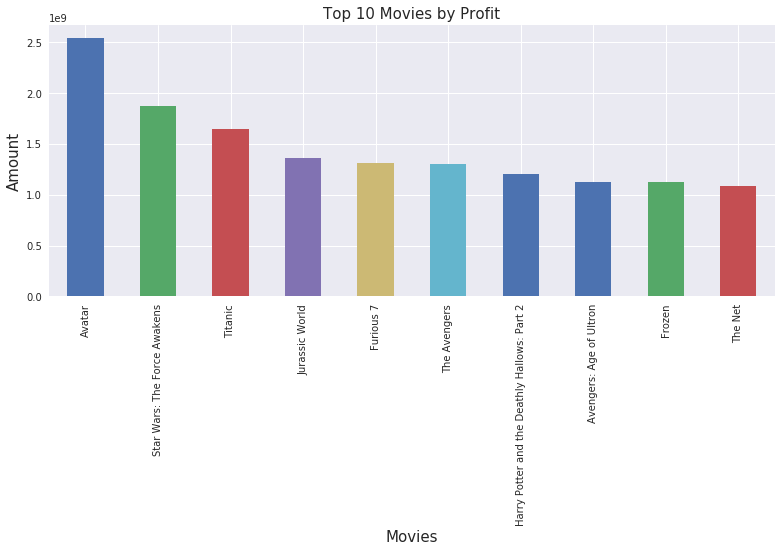

In [101]:
top_profit.index = top_profit['original_title']
top_profit['profit'].plot(kind='bar', figsize=(13, 5))
plt.xlabel('Movies', fontsize= 15)
plt.ylabel('Amount', fontsize=15)
plt.title('Top 10 Movies by Profit', fontsize=15);

**Note:** The Top profit movies are slightly different from the top revenue movies 

### Research Question 7 ( what are the Lowest 5 movies by profit ? )

In [51]:
top_lowest = df.nsmallest(5, 'profit')
top_lowest.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1687,46528,tt1032751,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,An Asian assassin (Dong-gun Jang) is forced to...,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08
4166,57201,tt1210819,1.214510,255000000.0,8.928991e+07,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,texas|horse|survivor|texas ranger|partner,The Texas Rangers chase down a gang of outlaws...,149.0,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,2.386885e+08,8.357833e+07,-1.657101e+08
5327,10733,tt0318974,0.948560,145000000.0,2.581996e+07,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,texas|officer|uprising|alamo|mexican,Based on the 1836 standoff between a group of ...,137.0,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.9,2004,1.673946e+08,2.980774e+07,-1.191800e+08
2652,50321,tt1305591,0.921653,150000000.0,3.899276e+07,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,boy|alien|rescue|martian|alien abduction,"When Martians suddenly abduct his mom, mischie...",88.0,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,129,5.5,2011,1.454097e+08,3.779950e+07,-1.110072e+08
1567,7978,tt0780653,0.642475,150000000.0,4.926000e+07,The Wolfman,Benicio del Toro|Anthony Hopkins|Emily Blunt|H...,Joe Johnston,father-son relationship|victorian england|rura...,"Lawrence Talbot, an American man on a visit to...",102.0,Horror|Thriller|Drama,Universal Pictures|Stuber Productions|Relativi...,2010-02-11,299,5.4,2010,1.500000e+08,6.363909e+07,-1.007400e+08


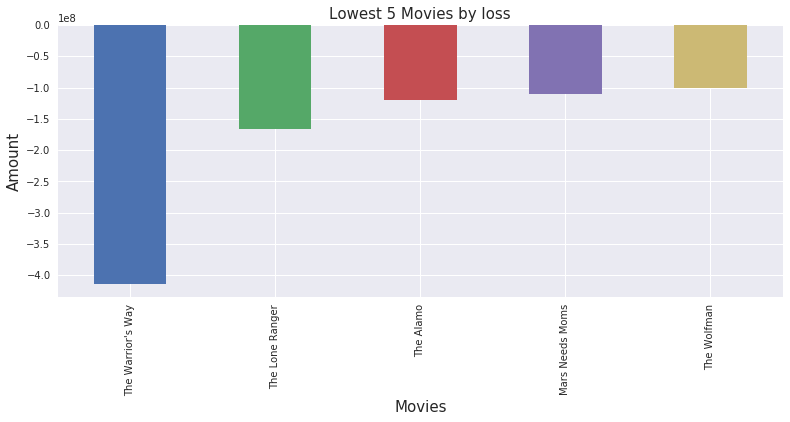

In [104]:
top_lowest.index = top_lowest['original_title']
top_lowest['profit'].plot(kind='bar', figsize=(13, 5))
plt.xlabel('Movies', fontsize= 15)
plt.ylabel('Amount', fontsize=15)
plt.title('Lowest 5 Movies by loss', fontsize=15);

**Note:** The highest loss Movie is The Warrior's Way	

### Research Question 8 (what is The Relation between Populairity and Revenue ? )

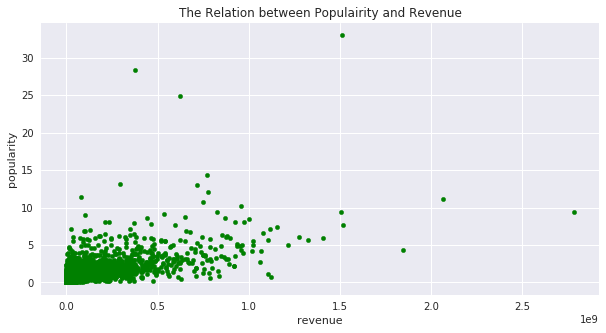

In [53]:
df.plot(x= 'revenue', y= 'popularity', c= 'green', kind= 'scatter', figsize=(10, 5))
plt.title('The Relation between Populairity and Revenue');

**Note:** Revenue and Popularity have positive correlation, When the Revenue increse the Popularity increases


### Research Question 9 (what is The Relation between Populairity and Vote Count ?)

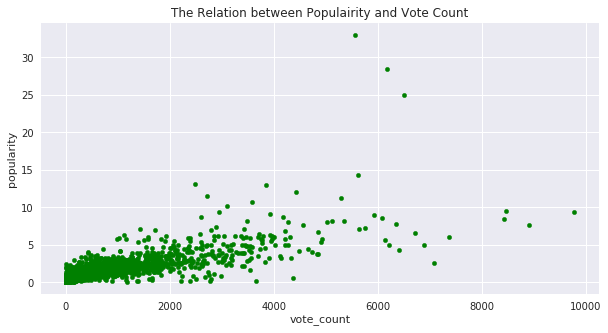

In [54]:
df.plot(x= 'vote_count', y= 'popularity', c= 'green', kind= 'scatter', figsize=(10, 5))
plt.title('The Relation between Populairity and Vote Count');

**Note:** vote count and Popularity have positive correlation, When the vote count increse the Popularity increases

### Research Question 10  (what are the Top 10 Rated Movies ?)

In [55]:
top_rated = df.nlargest(10, 'vote_count')
top_rated.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1425,27205,tt1375666,9.363643,160000000.0,8.255000e+08,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,loss of lover|dream|sleep|subconsciousness|heist,"Cobb, a skilled thief who commits corporate es...",148.0,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,1.600000e+08,8.255000e+08,6.655000e+08
3308,24428,tt0848228,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,When an unexpected enemy emerges and threatens...,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,1.299558e+09
1014,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09
2162,155,tt0468569,8.466668,185000000.0,1.001922e+09,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,dc comics|crime fighter|secret identity|scarec...,Batman raises the stakes in his war on crime. ...,152.0,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09,8.169218e+08
3311,68718,tt1853728,5.944518,100000000.0,4.253682e+08,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,Quentin Tarantino,bounty hunter|hero|plantation|society|friendship,"With the help of a German bounty hunter, a fre...",165.0,Drama|Western,Columbia Pictures|The Weinstein Company,2012-12-25,7375,7.7,2012,9.497443e+07,4.039911e+08,3.253682e+08
3329,70160,tt1392170,2.571099,75000000.0,6.912107e+08,The Hunger Games,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Gary Ross,hallucination|dystopia|female protagonist|bow ...,Every year in the ruins of what was once North...,142.0,Science Fiction|Adventure|Fantasy,Lionsgate|Color Force,2012-03-12,7080,6.7,2012,7.123082e+07,6.564734e+08,6.162107e+08
4086,68721,tt1300854,4.946136,200000000.0,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,When Tony Stark's world is torn apart by a for...,130.0,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.872067e+08,1.137692e+09,1.015440e+09
3310,49026,tt1345836,6.591277,250000000.0,1.081041e+09,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,dc comics|crime fighter|terrorist|secret ident...,Following the death of District Attorney Harve...,165.0,Action|Crime|Drama|Thriller,Legendary Pictures|Warner Bros.|DC Entertainme...,2012-07-16,6723,7.5,2012,2.374361e+08,1.026713e+09,8.310413e+08
440,157336,tt0816692,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,saving the world|artificial intelligence|fathe...,Interstellar chronicles the adventures of a gr...,169.0,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,4.567525e+08
3314,49051,tt0903624,4.218933,250000000.0,1.017004e+09,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,Peter Jackson,riddle|elves|dwarves|orcs|middle-earth (tolkien),"Bilbo Baggins, a hobbit enjoying his quiet lif...",169.0,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,2012-11-26,6417,6.9,2012,2.374361e+08,9.658933e+08,7.670036e+08


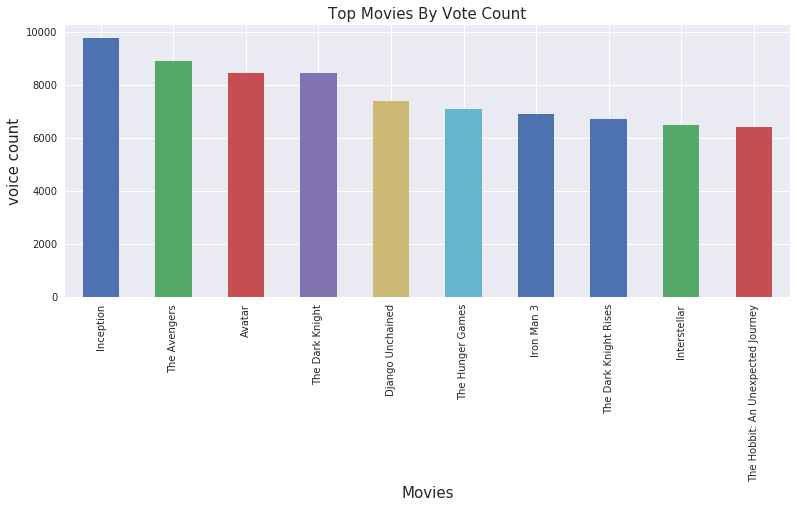

In [105]:
top_rated.index = top_rated['original_title']
top_rated['vote_count'].plot(kind='bar', figsize=(13, 5))
plt.xlabel('Movies', fontsize= 15)
plt.ylabel('voice count', fontsize=15)
plt.title('Top Movies By Vote Count', fontsize=15);

**Note:** Inception is the highest voice counts

### Research Question 11  (Which year has the highest number of movie releases ?)

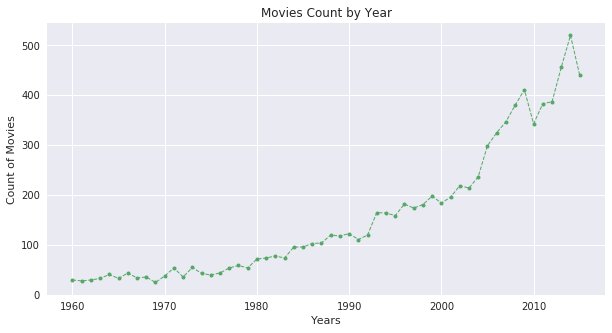

In [78]:
movie_per_year = df.groupby('release_year', as_index=False)['original_title'].count()
x = movie_per_year['release_year']
y = movie_per_year['original_title']
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'go--', markersize=4, linewidth=1)
plt.xlabel('Years')
plt.ylabel('Count of Movies')
plt.title('Movies Count by Year');

**Note:** The Movies releasing are increasing by years, and highest number of movies released in 2014

### Research Question 12 (Which production companies are most popular ? )

In [64]:
df_new2 = df.set_index('id')
df_new2.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09


**Note:** First We will set The id column as an index

In [65]:
p_companies = df_new2['production_companies'].str.split('|', expand=True)
p_companies = p_companies.stack()
p_companies = pd.DataFrame(p_companies, columns = ['production_companies'])
p_companies.head()

production_companies
id                               
135397 0        Universal Studios
       1     Amblin Entertainment
       2       Legendary Pictures
       3  Fuji Television Network
       4                   Dentsu

**Note:** Second we will split production companies column, then we will reshape the data frame using stack function and finally make the data a panda data frame

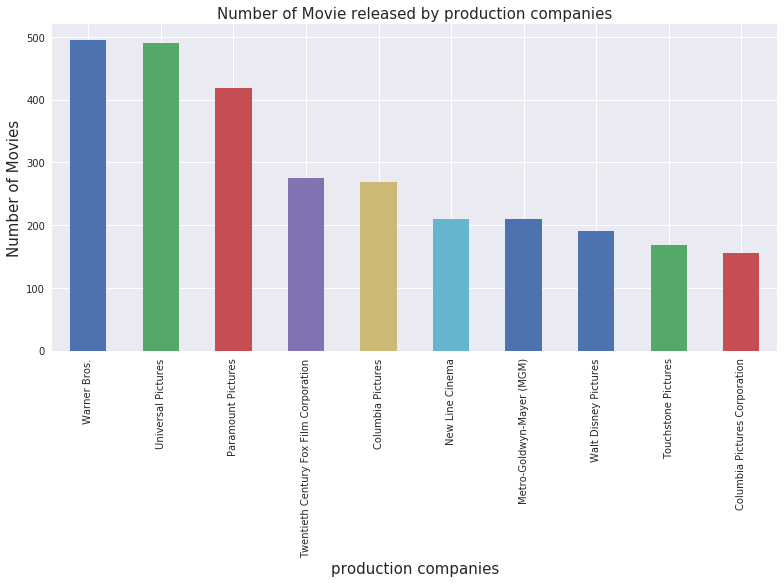

In [107]:
popular_companies = p_companies['production_companies'].value_counts()
popular_companies = popular_companies.nlargest(10)
popular_companies.plot(kind='bar', figsize=(13, 6))
plt.xlabel('production companies', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Number of Movie released by production companies', fontsize=15);

**Note:** The Chart above shows that Wamer Bros. has the highest number of movies relaesed, followed by Universal Picture  

<a id='conclusions'></a>
## Conclusions

1. The most popular genres is : Drama.
2. The most popular genres from year to year are : Drama and Comedy.
3. Revenue and Budget have a postive correlation, when Revenue increse the Budget increases.
4. The Top movie by Revenue is : Avatar.
5. The lowest movie by Revenue is: Mallrats.
6. The Top movie by profit is: Avatar.
7. The Highest movie by loss is: The Warrior's Way.
8. Revenue and Popularity have positive correlation, When the Revenue increse the Popularity increases.
9. vote count and Popularity have positive correlation, When the vote count increse the Popularity increases.
10. The Top Rated Movie is: Inception.
11. The Movies releasing are increasing by years, and highest number of movies released in 2014.
12. The most popular production company is: Wamer Bros.
13. Most of the movies runtime is between 100 to 150 minutes, And highest vote average count is between 5 to 7.

<a id='Limitations'></a>
## Limitations

1. The Data have many null values and if these nulls value all removed we gonna loss alot of data so I removed the columns which unusable and have the most null values.
2. After removing the columns with highest nulls, still there null values so i removed them. 
2. There is one duplicated raw so i removed it.
3. Change release date column type from strign to date format and id column from integer to string.
4. There are alot of zero values and if i remove them we will lost alot of data so i replaced them with the mean.
5. split the data seperated by '|' so it will be appropriate for analysis.

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

0